In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

np.random.seed(444)

### Blurring functions

In [66]:
def blur_image_loop(img, blur):
    dim_x, dim_y = img.shape
    blurred_img = np.zeros((dim_x, dim_y))
    sum_blur = np.sum(blur)
    for x in range(1, dim_x-1):
        for y in range(1, dim_y-1):
            area = img[x-1:x+2, y-1:y+2]
            blurred_value = np.sum(area * blur) / sum_blur
            blurred_img[x,y] = blurred_value
    return blurred_img

In [69]:
def blur_image_shift(img, blur):
    dim_x, dim_y = img.shape
    blurred_image =  np.zeros((dim_x, dim_y))
    blurred_image[1:-1, 1:-1] = (blur[1,1] * img[ 1:-1, 1:-1] +
                                 blur[0,1] * img[  :-2, 1:-1] +
                                 blur[2,1] * img[ 2:  , 1:-1] +
                                 blur[1,0] * img[ 1:-1,  :-2] +
                                 blur[1,2] * img[ 1:-1, 2:  ] +
                                 blur[0,0] * img[  :-2,  :-2] +
                                 blur[0,2] * img[  :-2, 2:  ] +
                                 blur[2,0] * img[ 2:  ,  :-2] +
                                 blur[2,2] * img[ 2:  , 2:  ]) / np.sum(blur)
    return blurred_image

In [70]:
from scipy.signal import convolve2d

def blur_image_scipy(img, blur):
    return convolve2d(img, blur, mode="same", boundary="fill") / np.sum(blur)

### Get image

In [71]:
filename = 'images/lena512.bmp'

img = mpimg.imread(filename)
print(img)
print(img.shape)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
(512, 512)


In [72]:
# img = np.random.normal(loc=100, scale=100, size=(100,100))
# img

### Blur matrix

In [73]:
blur = np.array([[0.25, 0.50, 0.25],
                 [0.50, 1.00, 0.50],
                 [0.25, 0.50, 0.25]])
blur

array([[0.25, 0.5 , 0.25],
       [0.5 , 1.  , 0.5 ],
       [0.25, 0.5 , 0.25]])

### Convolute image

In [74]:
blurred_img_loop = blur_image_loop(img, blur)
blurred_img_loop

array([[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    , 162.    , 161.75  , ..., 166.5   , 152.    ,   0.    ],
       [  0.    , 162.    , 161.75  , ..., 166.5   , 152.    ,   0.    ],
       ...,
       [  0.    ,  45.8125,  48.8125, ..., 101.9375, 101.25  ,   0.    ],
       [  0.    ,  46.25  ,  51.25  , ..., 102.9375, 104.25  ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ]])

In [75]:
blurred_img_shift = blur_image_shift(img, blur)
blurred_img_shift

array([[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    , 162.    , 161.75  , ..., 166.5   , 152.    ,   0.    ],
       [  0.    , 162.    , 161.75  , ..., 166.5   , 152.    ,   0.    ],
       ...,
       [  0.    ,  45.8125,  48.8125, ..., 101.9375, 101.25  ,   0.    ],
       [  0.    ,  46.25  ,  51.25  , ..., 102.9375, 104.25  ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ]])

In [76]:
blurred_img_scipy = blur_image_scipy(img, blur)
blurred_img_scipy

array([[ 91.125 , 121.5   , 121.3125, ..., 124.875 , 114.    ,  77.0625],
       [121.5   , 162.    , 161.75  , ..., 166.5   , 152.    , 102.75  ],
       [121.5   , 162.    , 161.75  , ..., 166.5   , 152.    , 102.75  ],
       ...,
       [ 33.    ,  45.8125,  48.8125, ..., 101.9375, 101.25  ,  75.1875],
       [ 32.8125,  46.25  ,  51.25  , ..., 102.9375, 104.25  ,  78.6875],
       [ 24.75  ,  35.0625,  40.3125, ...,  77.4375,  79.125 ,  60.1875]])

### Show image

<Figure size 432x288 with 0 Axes>

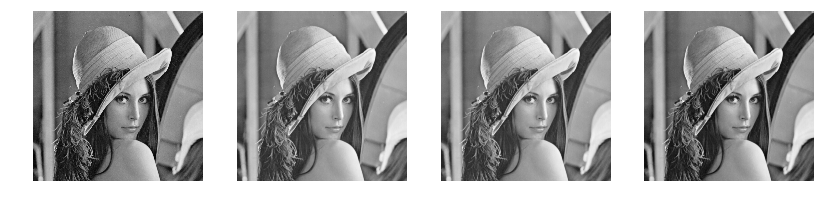

In [81]:
plt.set_cmap('gray')

fig, ax = plt.subplots(1,4)

fig.set_size_inches((14,4))
for sub in ax:
    sub.axis('off')

ax[0].imshow(img)
ax[1].imshow(blurred_img_loop)
ax[2].imshow(blurred_img_shift)
ax[3].imshow(blurred_img_scipy)

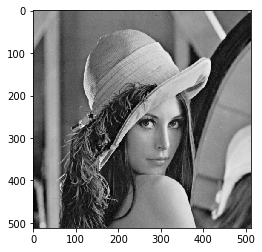

In [88]:
plt.imshow(img)

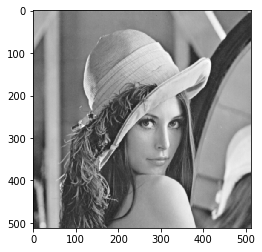

In [87]:
plt.imshow(blurred_img_loop)

In [85]:
blurred_img = blur_image_scipy(img, blur)
blurred_img

array([[ 91.125 , 121.5   , 121.3125, ..., 124.875 , 114.    ,  77.0625],
       [121.5   , 162.    , 161.75  , ..., 166.5   , 152.    , 102.75  ],
       [121.5   , 162.    , 161.75  , ..., 166.5   , 152.    , 102.75  ],
       ...,
       [ 33.    ,  45.8125,  48.8125, ..., 101.9375, 101.25  ,  75.1875],
       [ 32.8125,  46.25  ,  51.25  , ..., 102.9375, 104.25  ,  78.6875],
       [ 24.75  ,  35.0625,  40.3125, ...,  77.4375,  79.125 ,  60.1875]])

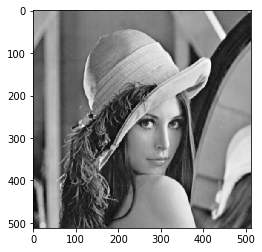

In [86]:
plt.imshow(blurred_img)

### Timeit

In [82]:
%timeit blur_image_loop(img, blur)

1.29 s ± 9.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
%timeit blur_image_shift(img, blur)

6.45 ms ± 83.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [84]:
%timeit blur_image_scipy(img, blur)

8.39 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
